<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Gradient_Tree_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
(GBRT) is a generalization of boosting to arbitrary differentiable loss functions. 

GradientBoostingClassifier supports both binary and multi-class classification.


"""

In [0]:
# Dummy Example

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

X, y = make_hastie_10_2(random_state=42)

X_train, y_train = X[:2000], y[:2000]

X_test, y_test   = X[2000:], y[2000:]

In [0]:
"""
Number of weak learners (regression trees) are controlled by n_estimators
linearing_rate is a parameter that controls overfitting with shrinkage ( range(0.0, 1])
"""

In [2]:
clf = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=1.0,
    max_depth=1,
    random_state=0
)

clf.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_test_pred = clf.predict(X_test)

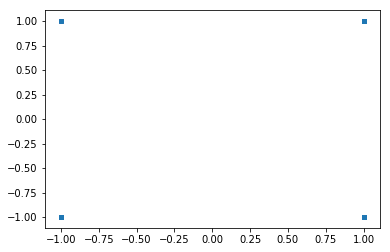

In [10]:
plt.scatter(y_test, y_test_pred, s=15, alpha=0.2)

In [11]:
clf.score(X_test, y_test)

0.9782

In [0]:
"""Regressor"""

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [0]:
boston = datasets.load_boston()

X, y = shuffle(boston.data, boston.target, random_state=42)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [0]:
params = {
    'n_estimators': 500,
    'max_depth':4,
    'min_samples_split':2,
    'learning_rate': 0.01,
    'loss': 'ls'
}

In [18]:
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
mse

7.898431892926665

Text(0, 0.5, 'MSE')

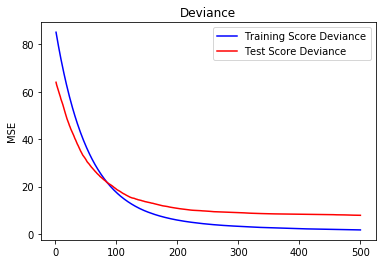

In [21]:
# Plot training deviance

test_score = np.zeros((500,), dtype=np.float32)
for i, y_pred in enumerate(clf.staged_predict(X_test)):
  test_score[i] = clf.loss_(y_test, y_pred)
  
plt.title("Deviance")
plt.plot(np.arange(500)+1, clf.train_score_, 'b-', label='Training Score Deviance')
plt.plot(np.arange(500)+1, test_score, 'r-', label='Test Score Deviance')
plt.legend()
plt.ylabel("MSE")

Text(0.5, 1.0, 'Variable Importance')

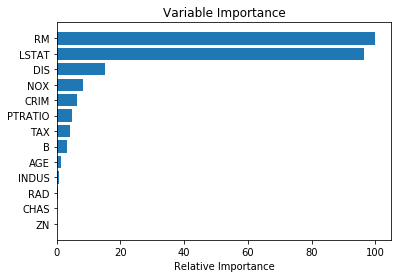

In [22]:
feature_importance = clf.feature_importances_
feature_importance = 100 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [0]:
"""
The size of the regression tree base learners defines the level of 
variable interactions that can be captured by the gradient boosting model. 

It can be controlled either by max_depth = h ( #leaf nodes = 2**h, #split nodes = 2**h -1)
max_leaf_nodes : number of leaf nodes = k ( #split nodes = k -1)
"""